In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_trn = pd.read_csv('train.csv')
df_tst = pd.read_csv('test.csv')

In [3]:
df_trn.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# Train

In [4]:
df_trn.shape

(891, 12)

In [5]:
df_trn.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df_trn.drop(['Cabin'], axis = 1, inplace = True)

In [7]:
df_trn = df_trn.drop_duplicates()

In [8]:
df_trn.shape

(891, 11)

In [9]:
df_trn.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [10]:
len(df_trn.PassengerId.unique())

891

In [11]:
df_trn.drop(['Name'], axis = 1, inplace = True)

In [12]:
df_trn.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [13]:
df_trn.Age.isnull().sum()

177

In [14]:
df_trn.Age.mean(), df_trn.Age.median()

(29.69911764705882, 28.0)

In [15]:
df_trn.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [16]:
df_trn.Age = df_trn.Age.fillna(df_trn['Age'].mean())

In [17]:
df_trn.drop(['Ticket'], axis = 1, inplace = True)

In [18]:
df_trn.Embarked = df_trn.Embarked.fillna( method ='ffill',limit=1)

In [19]:
df_trn.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [20]:
df_trn.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.25,S


In [21]:
df_trn.Embarked.value_counts()

S    644
C    169
Q     78
Name: Embarked, dtype: int64

In [22]:
df_trn.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
q3 = df_trn.Pclass.quantile(0.75)
q1 = df_trn.Pclass.quantile(0.25)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

(0.5, 4.5)

In [24]:
q3 = df_trn.SibSp.quantile(0.75)
q1 = df_trn.SibSp.quantile(0.25)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

(-1.5, 2.5)

In [25]:
df_trn.SibSp = df_trn.SibSp.clip(-1.5, 2.5)

In [26]:
q3 = df_trn.Parch.quantile(0.75)
q1 = df_trn.Parch.quantile(0.25)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

(0.0, 0.0)

In [27]:
df_trn.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [28]:
q3 = df_trn.Fare.quantile(0.75)
q1 = df_trn.Fare.quantile(0.75)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

(31.0, 31.0)

In [29]:
sex = df_trn.Sex
df1 = pd.get_dummies(sex)
df_trn = pd.concat([df_trn, df1], axis = 1)

In [30]:
df_trn.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male
0,1,0,3,male,22.0,1.0,0,7.2500,S,0,1
1,2,1,1,female,38.0,1.0,0,71.2833,C,1,0
2,3,1,3,female,26.0,0.0,0,7.9250,S,1,0


In [31]:
em = df_trn.Embarked
df1 = pd.get_dummies(em)
df_trn = pd.concat([df_trn, df1], axis = 1)

In [32]:
df_trn.drop(['Sex', 'Embarked', 'Fare'], axis = 1, inplace = True)

In [33]:
df_trn.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,female,male,C,Q,S
0,1,0,3,22.0,1.0,0,0,1,0,0,1
1,2,1,1,38.0,1.0,0,1,0,1,0,0
2,3,1,3,26.0,0.0,0,1,0,0,0,1


In [34]:
df_trn.shape

(891, 11)

In [35]:
df_trn.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.434488
SibSp          1.621154
Parch          2.749117
female         0.618921
male          -0.618921
C              1.585789
Q              2.923660
S             -0.997083
dtype: float64

# TEST

In [36]:
df_tst.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [37]:
df_tst.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [38]:
df_tst.drop_duplicates()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [39]:
df_tst.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [40]:
q3 = df_tst.Pclass.quantile(0.75)
q1 = df_tst.Pclass.quantile(0.25)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

(-2.0, 6.0)

In [41]:
q3 = df_tst.SibSp.quantile(0.75)
q1 = df_tst.SibSp.quantile(0.25)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

(-1.5, 2.5)

In [42]:
df_tst.SibSp = df_tst.SibSp.clip(-1.5, 2.5)

In [43]:
q3 = df_tst.Parch.quantile(0.75)
q1 = df_tst.Parch.quantile(0.25)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

(0.0, 0.0)

In [44]:
df_tst.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [45]:
df_tst.Age.mean(), df_tst.Age.median()

(30.272590361445783, 27.0)

In [46]:
df_tst.Age = df_tst.Age.fillna(df_tst.Age.mean())

In [47]:
df_tst.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [48]:
sex = df_tst.Sex
df1 = pd.get_dummies(sex)
df_tst = pd.concat([df_tst, df1], axis = 1)
df_tst.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,892,3,"Kelly, Mr. James",male,34.5,0.0,0,330911,7.8292,NaN,Q,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1.0,0,363272,7.0000,NaN,S,1,0


In [49]:
em = df_tst.Embarked
df1 = pd.get_dummies(em)
df_tst = pd.concat([df_tst, df1], axis = 1)
df_tst.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male,C,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0.0,0,330911,7.8292,NaN,Q,0,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1.0,0,363272,7.0000,NaN,S,1,0,0,0,1


In [50]:
df_tst.shape

(418, 16)

In [51]:
df_tst.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'female', 'male', 'C', 'Q', 'S'],
      dtype='object')

In [52]:
df_tst.drop(['Name', 'Sex', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis = 1, inplace = True)

In [53]:
df_tst.shape

(418, 10)

In [54]:
df_tst.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'female', 'male', 'C',
       'Q', 'S'],
      dtype='object')

In [55]:
df_tst.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
female         0
male           0
C              0
Q              0
S              0
dtype: int64

In [56]:
df_tst.dtypes

PassengerId      int64
Pclass           int64
Age            float64
SibSp          float64
Parch            int64
female           uint8
male             uint8
C                uint8
Q                uint8
S                uint8
dtype: object

# EDA

In [57]:
df_trn.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'female',
       'male', 'C', 'Q', 'S'],
      dtype='object')

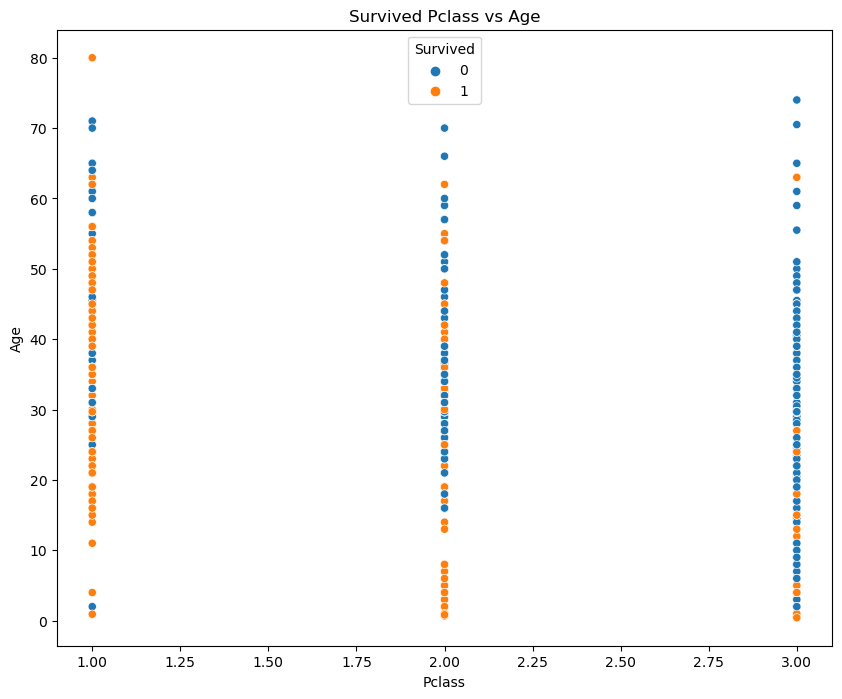

In [58]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = df_trn)
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.title('Survived Pclass vs Age')
plt.show()

<AxesSubplot:>

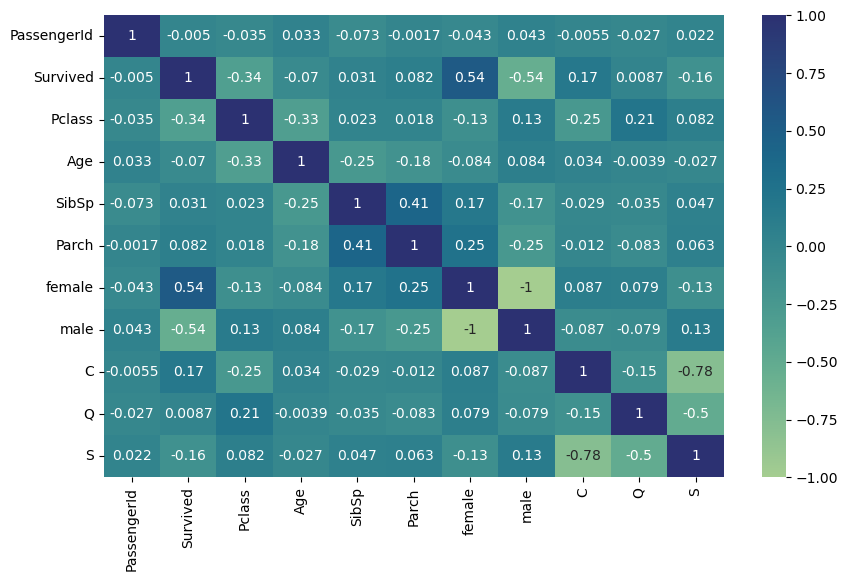

In [59]:
corr = df_trn.corr()
plt.figure(figsize = (10, 6))
sns.heatmap(corr, annot = True, cmap='crest')

In [60]:
df_trn.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'female',
       'male', 'C', 'Q', 'S'],
      dtype='object')

In [61]:
dff = pd.read_csv('gender_submission.csv')
dff.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [62]:
df_tst = pd.merge(df_tst, dff, on = ['PassengerId'], how = 'inner')

In [63]:
df_tst

,PassengerId,Pclass,Age,SibSp,Parch,female,male,C,Q,S,Survived
0,892,3,34.50000,0.0,0,0,1,0,1,0,0
1,893,3,47.00000,1.0,0,1,0,0,0,1,1
2,894,2,62.00000,0.0,0,0,1,0,1,0,0
3,895,3,27.00000,0.0,0,0,1,0,0,1,0
4,896,3,22.00000,1.0,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0.0,0,0,1,0,0,1,0
414,1306,1,39.00000,0.0,0,1,0,1,0,0,1
415,1307,3,38.50000,0.0,0,0,1,0,0,1,0
416,1308,3,30.27259,0.0,0,0,1,0,0,1,0


# Train Test split

In [64]:
X_train = df_trn[['Pclass', 'Age', 'SibSp', 'Parch', 'female', 'male', 'C', 'Q', 'S']].values
y_train = df_trn['Survived'].values
X_test = df_tst[['Pclass', 'Age', 'SibSp', 'Parch', 'female', 'male', 'C', 'Q', 'S']].values
y_test = df_tst['Survived'].values

# Scaling

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# KNN

In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()


In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, plot_roc_curve
for i in range(1,31) :
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    print('K Value : ', i, 'Train Score : ', knn.score(X_train, y_train), 'CV Score : ', np.mean(cross_val_score(knn, X_train, y_train, cv = 10, scoring = 'roc_auc')))

C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid t

K Value :  1 Train Score :  0.8967452300785634 CV Score :  0.7424358430240783
K Value :  2 Train Score :  0.8664421997755332 CV Score :  0.7921565515094927
K Value :  3 Train Score :  0.8731762065095399 CV Score :  0.81625597713833


C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid t

K Value :  4 Train Score :  0.8608305274971941 CV Score :  0.828204453498571
K Value :  5 Train Score :  0.8585858585858586 CV Score :  0.8390785445491329
K Value :  6 Train Score :  0.8361391694725028 CV Score :  0.8439665563194975


C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid t

K Value :  7 Train Score :  0.8462401795735129 CV Score :  0.8542311348781937
K Value :  8 Train Score :  0.8316498316498316 CV Score :  0.8570345471521943
K Value :  9 Train Score :  0.835016835016835 CV Score :  0.8515422290128172


C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid t

K Value :  10 Train Score :  0.8316498316498316 CV Score :  0.8515303737656679
K Value :  11 Train Score :  0.8361391694725028 CV Score :  0.8521398862575333
K Value :  12 Train Score :  0.8338945005611672 CV Score :  0.8533750389044507
K Value :  13 Train Score :  0.8294051627384961 CV Score :  0.855979797979798


C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid t

K Value :  14 Train Score :  0.8294051627384961 CV Score :  0.8592974280621339
K Value :  15 Train Score :  0.8316498316498316 CV Score :  0.8592249950485245
K Value :  16 Train Score :  0.8338945005611672 CV Score :  0.8605661658602836


C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid t

K Value :  17 Train Score :  0.8305274971941639 CV Score :  0.8569606145488498
K Value :  18 Train Score :  0.835016835016835 CV Score :  0.8576165011459128
K Value :  19 Train Score :  0.8361391694725028 CV Score :  0.8578441275500099
K Value :  20 Train Score :  0.8249158249158249 CV Score :  0.8568225957049485
K Value :  21 Train Score :  0.8271604938271605 CV Score :  0.858564468211527


C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid t

K Value :  22 Train Score :  0.8237934904601572 CV Score :  0.8576822850352261
K Value :  23 Train Score :  0.8260381593714927 CV Score :  0.8554824434824434


C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid t

K Value :  24 Train Score :  0.8226711560044894 CV Score :  0.8585166511048865
K Value :  25 Train Score :  0.8204264870931538 CV Score :  0.8574922898452311
K Value :  26 Train Score :  0.819304152637486 CV Score :  0.8557327617915853
K Value :  27 Train Score :  0.8204264870931538 CV Score :  0.8561899668958493


C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid t

K Value :  28 Train Score :  0.8204264870931538 CV Score :  0.8560772147242736
K Value :  29 Train Score :  0.8204264870931538 CV Score :  0.8544740401210991
K Value :  30 Train Score :  0.8159371492704826 CV Score :  0.8538920861273802


C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid t

In [68]:
knn = KNeighborsClassifier(16)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=16)

In [97]:
y_predict_knn = knn.predict(X_test)

C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [98]:
knn.score(X_test, y_test)

C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9282296650717703

C:\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


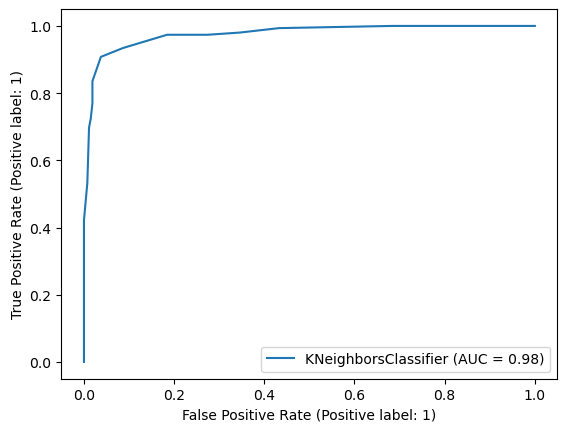

In [99]:
plot_roc_curve(knn, X_test, y_test)

In [101]:
df_predict = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_predict_knn})
df_predict

,Actual,Predicted
0,0,0
1,1,0
2,0,0
3,0,0
4,1,0
...,...,...
413,0,0
414,1,1
415,0,0
416,0,0


In [102]:
result=pd.DataFrame({'PassengerId':df_tst.PassengerId,'Survived':y_predict_knn})

In [103]:
result.to_csv('submission.csv',index=False)

In [104]:
dff['Survived predict knn'] = y_predict_knn

In [105]:
dff.columns

Index(['PassengerId', 'Survived', 'Survived predict knn',
       'Survived predict log', 'Survived predict Dtree'],
      dtype='object')

In [106]:
a = len(dff[ (dff['Survived'] == dff['Survived predict knn']) ])
accuracy = ((a*100)/len(dff))
accuracy

92.82296650717703

# Logistic Regression

In [107]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [108]:
log.score(X_test, y_test)

0.9425837320574163

C:\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


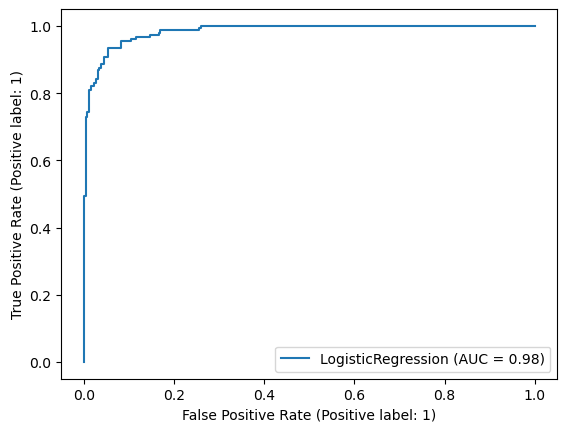

In [109]:
plot_roc_curve(log, X_test, y_test)

In [111]:
y_predict_log = log.predict(X_test)

In [112]:
dff['Survived predict log'] = y_predict_log

In [113]:
dff

,PassengerId,Survived,Survived predict knn,Survived predict log,Survived predict Dtree
0,892,0,0,0,0
1,893,1,0,0,0
2,894,0,0,0,0
3,895,0,0,0,0
4,896,1,0,1,0
...,...,...,...,...,...
413,1305,0,0,0,0
414,1306,1,1,1,1
415,1307,0,0,0,0
416,1308,0,0,0,0


In [84]:
a = len(dff[ (dff['Survived'] == dff['Survived predict log'])])
accuracy = ((a*100)/len(dff))
accuracy

94.25837320574162

# Decision Tree

In [85]:
from sklearn.tree import DecisionTreeClassifier
for depth in range(1,16) :
    dt = DecisionTreeClassifier(max_depth = depth)
    dt.fit(X_train, y_train)
    train = dt.score(X_train, y_train)
    csv = np.mean(cross_val_score(dt,X_train, y_train, cv = 10, scoring = 'roc_auc'))
    print('Depth : ', depth, "Train Score : ", train, 'CV Score : ', csv)

Depth :  1 Train Score :  0.7867564534231201 CV Score :  0.7668003565062389
Depth :  2 Train Score :  0.7957351290684624 CV Score :  0.8021547972724443
Depth :  3 Train Score :  0.8282828282828283 CV Score :  0.8451156381744618
Depth :  4 Train Score :  0.8338945005611672 CV Score :  0.8501235888294711
Depth :  5 Train Score :  0.8507295173961841 CV Score :  0.8402061511473276
Depth :  6 Train Score :  0.8518518518518519 CV Score :  0.8339704609116374
Depth :  7 Train Score :  0.867564534231201 CV Score :  0.8194256571315395
Depth :  8 Train Score :  0.8765432098765432 CV Score :  0.8048703562232975
Depth :  9 Train Score :  0.8945005611672279 CV Score :  0.7911925699572759
Depth :  10 Train Score :  0.9034792368125701 CV Score :  0.7781708966414849
Depth :  11 Train Score :  0.9147025813692481 CV Score :  0.764043799337917
Depth :  12 Train Score :  0.9248035914702581 CV Score :  0.7622842429901254
Depth :  13 Train Score :  0.9304152637485971 CV Score :  0.7626992615227909
Depth :  1

In [86]:
dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.8827751196172249

In [114]:
y_predict_Dtree = dt.predict(X_test)

In [115]:
dff['Survived predict Dtree'] = y_predict_Dtree

In [116]:
dff

,PassengerId,Survived,Survived predict knn,Survived predict log,Survived predict Dtree
0,892,0,0,0,0
1,893,1,0,0,0
2,894,0,0,0,0
3,895,0,0,0,0
4,896,1,0,1,0
...,...,...,...,...,...
413,1305,0,0,0,0
414,1306,1,1,1,1
415,1307,0,0,0,0
416,1308,0,0,0,0


In [117]:
a = len(dff[dff['Survived'] == dff['Survived predict Dtree']])
accuracy = ((a*100)/len(dff))
accuracy

88.27751196172248

In [118]:
from sklearn.metrics import roc_auc_score, plot_roc_curve, accuracy_score, f1_score
f1_score(y_test, y_predict_Dtree)

0.8164794007490637

In [119]:
accuracy_score(y_test, y_predict_Dtree)

0.8827751196172249

C:\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


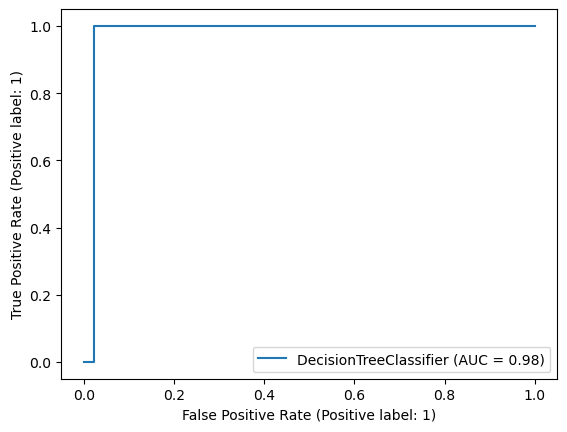

In [120]:
plot_roc_curve(dt, X_test, y_test)

# Accuracy

In [125]:
knn = accuracy_score(y_test, y_predict_knn)
log = accuracy_score(y_test, y_predict_log)
Dtree = accuracy_score(y_test, y_predict_Dtree)
print('KNN : ', knn,'\n'
      'LOGISTIC : ', log,'\n' 
      'DECISION TREE : ', Dtree)

KNN :  0.9282296650717703 
LOGISTIC :  0.9425837320574163 
DECISION TREE :  0.8827751196172249
